### Gradient descent

This notebook reviews a widely used algorithm in optimization and machine learning called gradient descent. The primary goal of this algorithm is to find the points that numerically minimize a given function.

For functions of one or two variables, finding the minimum is typically straightforward. In the 1D case, this involves calculating the derivative of the function and solving a simple algebraic equation. For 2D functions, the process extends to solving a system of two equations involving the gradient. However, as the number of dimensions increases, the number of equations to solve grows as well. This makes analytical methods computationally expensive for high-dimensional problems.

In machine learning, the dimensionality of a problem is often tied to the number of features in the dataset under consideration. It is not uncommon for datasets to contain thousands of features. Minimizing the cost function in such cases would require solving a system of thousands of equations, which is computationally expensive. Thus, iterative optimization techniques like gradient descent are used as an efficient alternative.

Gradient descent avoids solving these equations directly. Instead, it iteratively updates the parameters by moving in the direction of the negative gradient (i.e., the steepest descent). This approach is particularly effective for high-dimensional problems, making it a cornerstone of modern machine learning optimization. For a more detailed review of the mathematics behind the gradient descent algorithm, look at the notes in the repository (Under construction).

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import jax 
import jax.numpy as jnp
import time # This library is included to control the time each frame of the dynamical plot appears

This is an implementation of the gradient descent algorithm in 1D.

In [2]:
def gradient_descent_1D(f, x_min, x_max, N, learning_rate=0.001):
    """
    Implements the gradient descent algorithm in one dimension to the point x_i where the minimum of the function f lies in the interval [x_min, x_max].

    Parameters:
    f (function): The objective function of which we wish to find the point where the minimum lies.
    x_min (Real): The lower bound of the interval where we look for the minimum.
    x_max (Real): The upper bound of the interval where we look for the minimum.
    N (int): The number of iterations.
    learning_rate (Real): The learning rate which controls the resolution of the steps between points.
    """
    x = np.linspace(x_min, x_max, 100) # Definition of the interval/x-axis.
    x_0 = np.random.uniform(x_min, x_max) # Random choice of initial point.
    x_i = x_0
    fig, ax = plt.subplots()
    gradient = jax.grad(f) # Gradient computation.

    for i in range(N):
        x_i = x_i - learning_rate * gradient(x_i) # Point update.
        x_i = np.clip(x_i, x_min, x_max) # Ensure that x_i lies within the interval [x_min, x_max]. If x_i < x_min, x_i is set to x_min. If x_i > x_max, x_i is set to x_max.
        
        # Clear and redraw plot
        ax.cla()
        plt.grid()
        ax.plot(x, f(x), label=r'$f(x)$')
        ax.plot([x_i], [f(x_i)], marker='o', color='red', label=r'$f(x_i)$')
        ax.legend(loc='upper right')
        ax.set_title(f"Iteration {i+1}/{N}")
        plt.xlabel(r'$x$')
        plt.ylabel(r'$f(x)$')
        clear_output(wait=True)  # Clear previous output
        display(fig)            # Display updated figure
        time.sleep(0.3)

        # Stop iterating when we are very close to minimum.
        if abs(gradient(x_i)) < 1e-6:
            print(f"Converged at iteration {i+1}")
            break
        
    return x_i

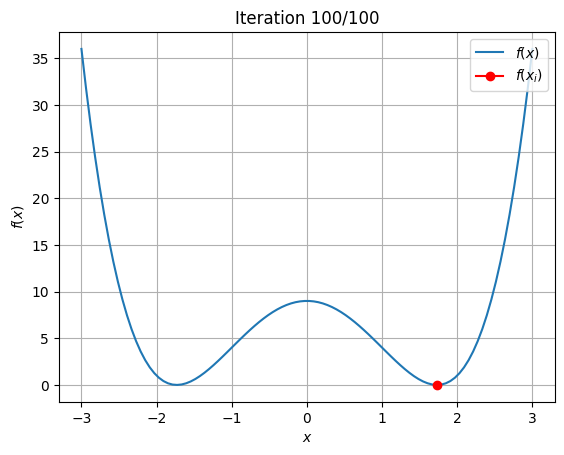

1.7320510149002075

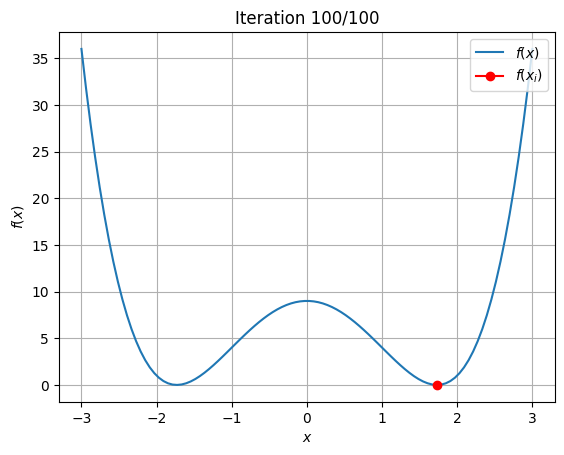

In [3]:
def f1(x):
    return (3 - x ** 2) ** 2 # This function is important in physics. It is the Higgs or double well potenital.

gradient_descent_1D(f1, -3., 3., 100, 0.01)

This is the implementation of the gradient descent algorithm in 2D.

In [4]:
def gradient_descent_2D(f, vec_x_min, vec_x_max, N, learning_rate=0.01, seed=None):
    """
    Implements gradient descent in 2D for minimizing a function f with 3D visualization.
    
    Parameters:
        f (function): The objective function to minimize, taking two arguments.
        vec_x_min (list): Lower bounds for the search space [x_min, y_min].
        vec_x_max (list): Upper bounds for the search space [x_max, y_max].
        N (int): Number of iterations.
        learning_rate (float): Step size for updating the parameters.
    
    Returns:
        vec_x_i (list): Approximate coordinates of the minimum point.
        f_value (float): Function value at the minimum point.
    """
    
    # Random initialization within bounds
    vec_x_0 = [np.random.uniform(vec_x_min[0], vec_x_max[0]), np.random.uniform(vec_x_min[1], vec_x_max[1])] # Random choice of initial point.
    vec_x_i = np.array(vec_x_0)
    
    nablaf = [jax.grad(f, argnums=i) for i in range(2)] # Gradient computation.
    
    # Mesh grid for the surface plot.
    x = np.linspace(vec_x_min[0], vec_x_max[0], 100)
    y = np.linspace(vec_x_min[1], vec_x_max[1], 100)
    X, Y = np.meshgrid(x, y) # Grid wih one x-axis for each point in y.
    Z = np.array(f(X, Y)) # Evaluate function on the grid.
    
    # Set up the 3D plot.
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Gradient descent loop
    for i in range(N):
        
        gradients = np.array([nablaf[k](vec_x_i[0], vec_x_i[1]) for k in range(2)])
        vec_x_i = vec_x_i - learning_rate * gradients # Update point.
        
        vec_x_i = np.clip(vec_x_i, vec_x_min, vec_x_max) # Ensure that point lies within desired interval.
        
        # Clear and update plot.
        ax.cla()
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')  # Plot surface
        ax.scatter(vec_x_i[0], vec_x_i[1], f(vec_x_i[0], vec_x_i[1]), color='red', s=50, label=f'Iteration {i+1}/{N}')
        
        ax.set_title(f"Gradient Descent Iteration {i+1}/{N}")
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_zlabel('Z-axis')
        ax.legend(loc='upper left')
        
        # Update display
        clear_output(wait=True)
        display(fig)
        time.sleep(0.3)

        if abs(gradients[0]) and abs(gradients[1]) < 1e-6:
            print(f"Converged at iteration {i+1}")
            break

    plt.show()

    
    
    return vec_x_i, f(vec_x_i[0], vec_x_i[1])

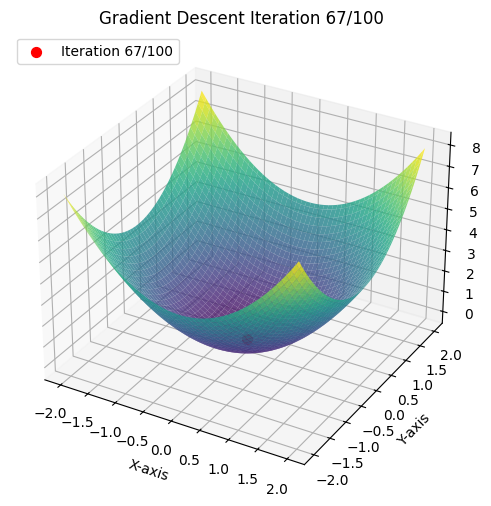

Converged at iteration 67


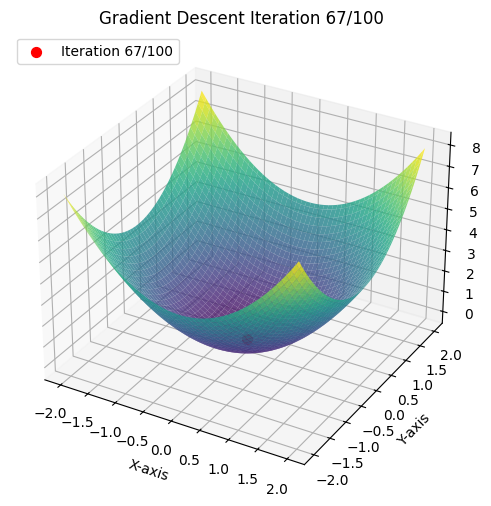

(array([-4.11680205e-07,  3.41505269e-07]), 2.8610643987928673e-13)

In [5]:
def F(x, y):
    return x ** 2 + y ** 2

gradient_descent_2D(F, [-2., -2.], [2., 2.], 100, 0.1)